<a href="https://colab.research.google.com/github/TerekliTahaBerk/data-science-portfolio/blob/main/Predicting%20Boston%20Housing%20Prices/Predicting_Boston_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Boston Housing Prices

---




### Import Libraries and Load Dataset

This code block is designed to import necessary libraries and load the dataset for the **Predicting Boston Housing Prices** project. The following actions are performed:

1. **Importing Required Libraries:**
   - `numpy`: For mathematical computations.
   - `pandas`: For data processing and analysis.
   - `sklearn.model_selection.ShuffleSplit`: Used for splitting the dataset into shuffled training and testing sets.

2. **Additional Visualization Tools:**
   - `visuals.py`: Contains functions for creating visualizations used in this project.

3. **Notebook Display Settings:**
   - `%matplotlib inline`: Ensures that visualizations are displayed directly within the notebook.

4. **Loading the Boston Housing Dataset:**
   - The `housing.csv` file is loaded using `pandas`.
   - **Target Variable (prices):** The 'MEDV' column is extracted as the target variable.
   - **Features (features):** All columns except 'MEDV' are treated as features.

5. **Dataset Summary:**
   - Prints the number of data points and variables in the dataset.

This step prepares the dataset for exploration and subsequent analysis.

In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('/content/housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))


Boston housing dataset has 489 data points with 4 variables each.


### Calculate and Display Basic Statistics

This code block calculates and displays key statistics for the target variable (`prices`) in the Boston housing dataset. These statistics provide an overview of the distribution of housing prices:

1. **Calculated Statistics:**
   - `minimum_price`: The lowest housing price in the dataset.
   - `maximum_price`: The highest housing price in the dataset.
   - `mean_price`: The average housing price.
   - `median_price`: The middle value of the housing prices when sorted.
   - `std_price`: The standard deviation, which measures the spread of housing prices around the mean.

2. **Output:**
   - The calculated statistics are formatted and printed for better readability.

This step helps to understand the range, central tendency, and variability of the housing prices in the dataset.

In [ ]:
minimum_price = np.min(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Visualize Relationships Between Features and Prices

This code block generates scatter plots with regression lines to explore the relationships between each feature in the dataset and the target variable (`prices`). The following steps are performed:

1. **Libraries Used:**
   - `matplotlib.pyplot`: For creating visualizations.
   - `seaborn`: For enhanced data visualization, including regression plots.

2. **Process:**
   - Iterates through each column in the `features` dataset.
   - Uses `seaborn.regplot` to create a scatter plot with a regression line for each feature against the target variable (`prices`).

3. **Output:**
   - Displays a series of plots, one for each feature, showing its correlation with housing prices.

These visualizations help identify patterns, trends, and potential linear relationships between the features and the target variable.

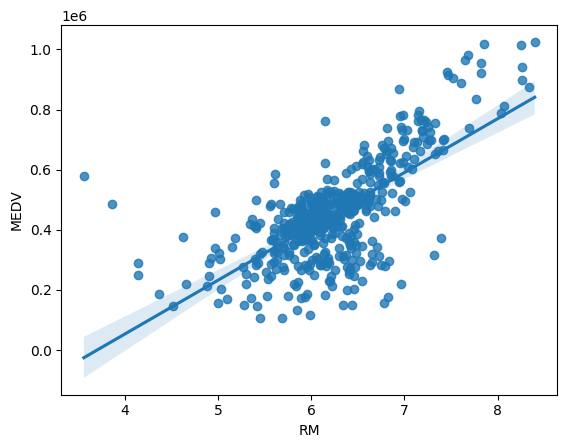

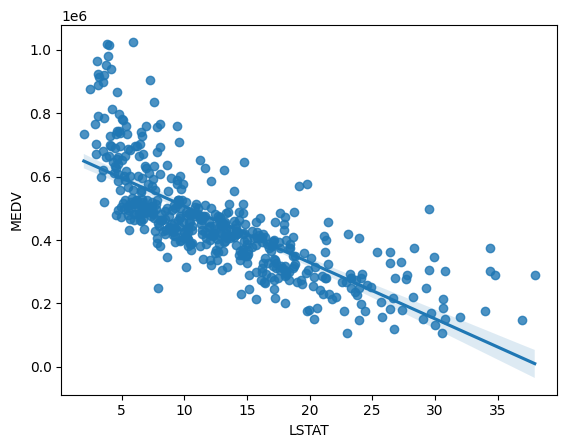

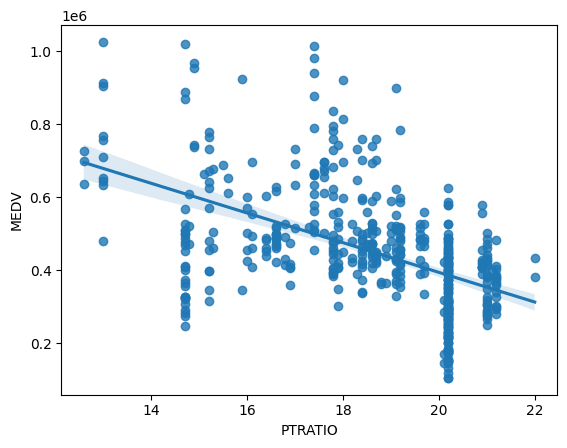

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for var in features.columns:
  sns.regplot(x=data[var], y=prices)
  plt.show()

### Define Performance Metric Function

This code block defines a function to evaluate the performance of a model using the \( R^2 \) (coefficient of determination) metric. The steps are as follows:

1. **Imported Function:**
   - `r2_score` from `sklearn.metrics`: Calculates the \( R^2 \) value, which measures the proportion of variance in the dependent variable that is predictable from the independent variables.

2. **Function Definition:**
   - `performance_metric(y_true, y_predict)`: Takes two arguments:
     - `y_true`: The actual target values.
     - `y_predict`: The predicted target values.
   - Returns the \( R^2 \) score as `score`.

3. **Purpose:**
   - \( R^2 \) ranges from 0 to 1, where higher values indicate better model performance.
   - This function will be used to evaluate how well the model's predictions match the actual data.

This step establishes a standardized way to assess model accuracy during the training and testing phases.

In [ ]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
  score = r2_score(y_true, y_predict)
  return score

### Evaluate Model Performance Using \( R^2 \) Metric

This code block evaluates the performance of a model by calculating its \( R^2 \) (coefficient of determination) score. The following steps are performed:

1. **Input Data:**
   - `y_true`: The actual target values, provided as `[3, -0.5, 2, 7, 4.2]`.
   - `y_predict`: The predicted target values, provided as `[2.5, 0.0, 2.1, 7.8, 5.3]`.

2. **Function Call:**
   - The `performance_metric` function, defined earlier, is called with `y_true` and `y_predict` as inputs.
   - The function computes the \( R^2 \) score using `sklearn.metrics.r2_score`.

3. **Output:**
   - The calculated \( R^2 \) score is printed in a formatted message, showing the model's ability to explain the variance in the data.

This step demonstrates the model's performance by quantifying how well its predictions align with the actual values.

In [ ]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


### Split Dataset into Training and Testing Sets

This code block shuffles and splits the dataset into training and testing subsets to prepare for model training and evaluation. The following steps are performed:

1. **Library Used:**
   - `train_test_split` from `sklearn.model_selection`: A utility function to split data into random training and testing subsets.

2. **Splitting Process:**
   - `features`: The input features are divided into `X_train` and `X_test`.
   - `prices`: The target variable is divided into `y_train` and `y_test`.
   - `test_size=0.2`: Allocates 20% of the data to the testing subset and the remaining 80% to the training subset.
   - `random_state=100`: Ensures reproducibility by using a fixed random seed.

3. **Output:**
   - Prints a success message confirming that the dataset has been successfully split.

This step is critical for evaluating the model's performance on unseen data, ensuring that the training and testing subsets are independent of each other.

In [ ]:
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,prices,test_size=0.2,random_state=100)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


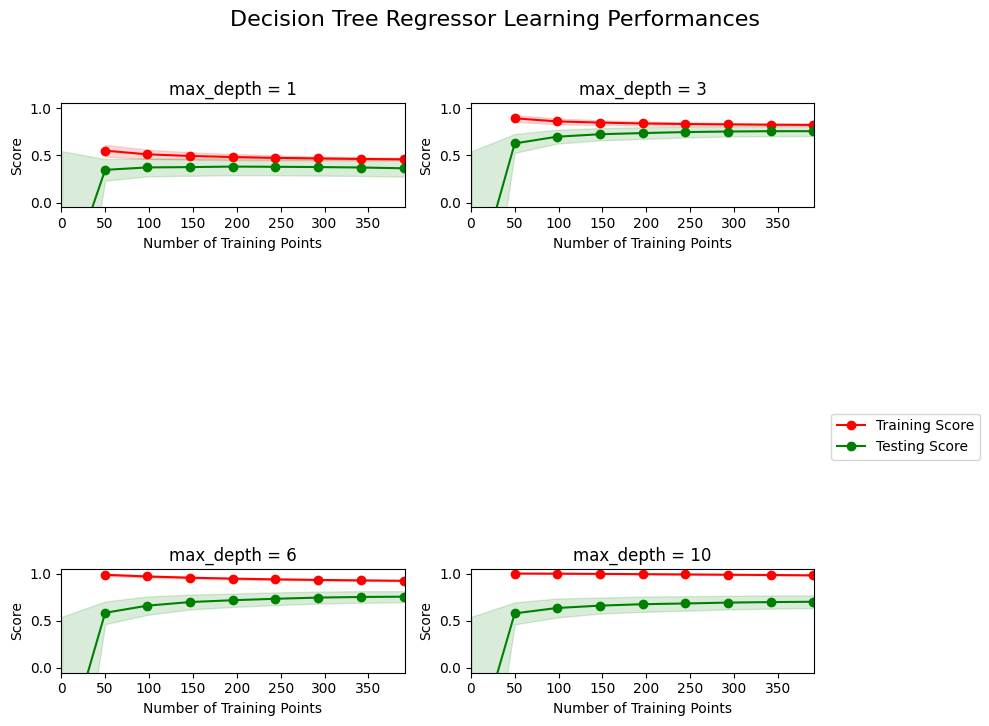

In [ ]:
# Produce learning curves for varying training set sizes and maximum depths
import warnings
warnings.filterwarnings("ignore")  # suppress warnings
vs.ModelLearning(features, prices)

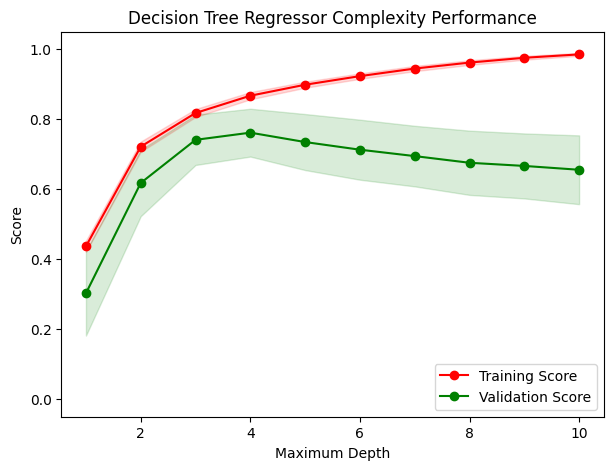

In [ ]:
vs.ModelComplexity(X_train, y_train)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a
        decision tree regressor trained on the input data [X, y]. """

    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 0)

    regressor = DecisionTreeRegressor()
    params = {'max_depth': range(1,11)}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(regressor,params,scoring=scoring_fnc,cv=cv_sets)
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [ ]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [ ]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $401,333.33
Predicted selling price for Client 2's home: $240,947.37
Predicted selling price for Client 3's home: $893,700.00
